<a href="https://colab.research.google.com/github/gowtham-patnala/gatsby-ecommerce-theme/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Amazon Sales data.csv")

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
data.shape

(100, 14)

In [5]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['Country'].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [10]:

data['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

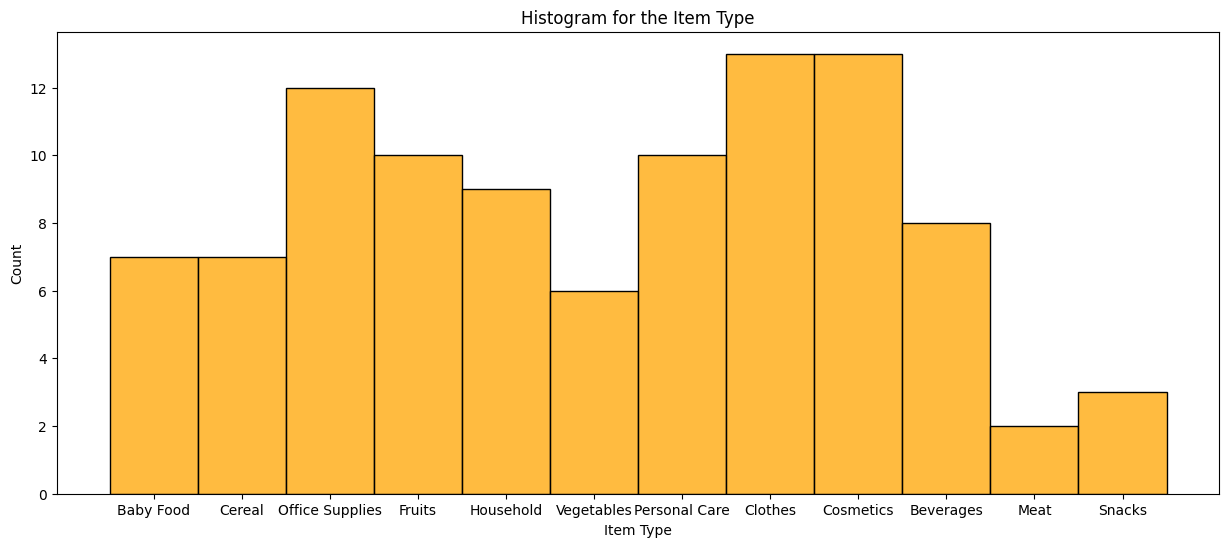

In [11]:
plt.figure(figsize=(15,6))

sns.histplot(x= 'Item Type', data = data, color= 'orange')

plt.title("Histogram for the Item Type")
plt.grid(False)
plt.show()

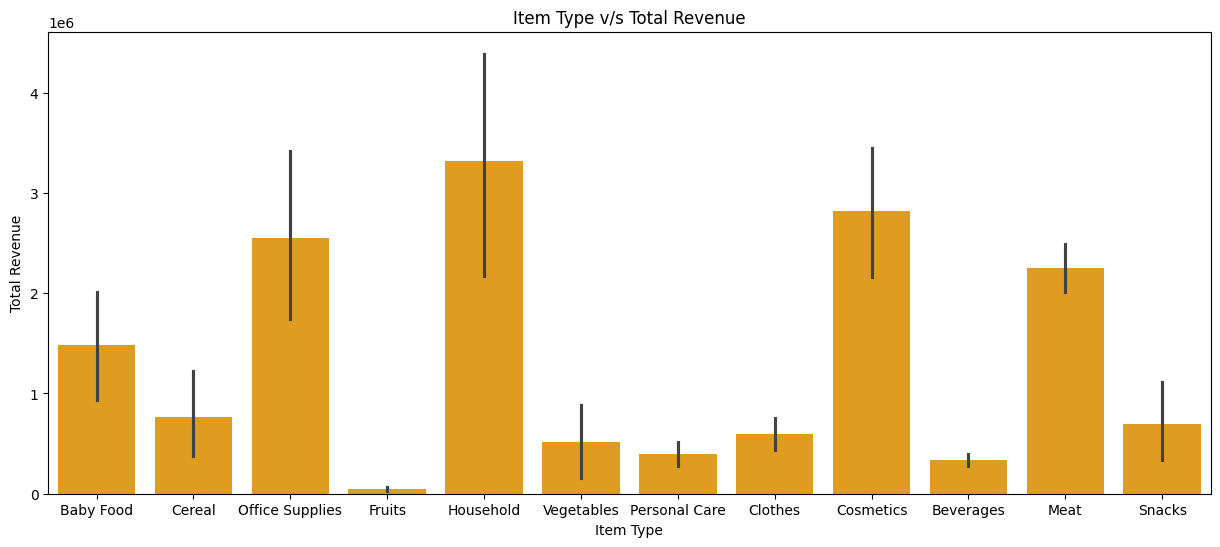

In [12]:
plt.figure(figsize=(15,6))

sns.barplot(x= 'Item Type',y= 'Total Revenue', data = data, color= 'orange')

plt.title("Item Type v/s Total Revenue")
plt.grid(False)
plt.show()

In [13]:
data['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

In [14]:
data['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

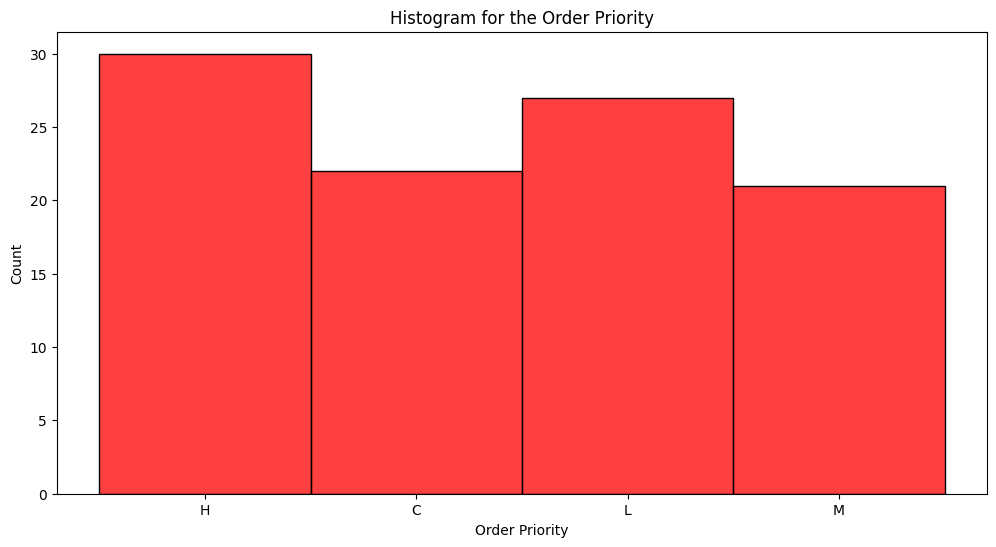

In [15]:
plt.figure(figsize=(12,6))

sns.histplot(x= 'Order Priority', data= data, color= 'red')
plt.title("Histogram for the Order Priority")
plt.grid(False)
plt.show()

In [16]:
data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [18]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [19]:
data[['Order Month', 'Order Year']]

,Order Month,Order Year
0,5,2010
1,8,2012
2,5,2014
3,6,2014
4,2,2013
...,...,...
95,7,2011
96,11,2011
97,6,2016
98,7,2015


In [20]:
month_wise_sales = data.groupby('Order Month').agg({'Total Revenue': 'sum'}).reset_index()
print(month_wise_sales)

    Order Month  Total Revenue
0             1    10482467.12
1             2    24740517.77
2             3     2274823.87
3             4    16187186.33
4             5    13215739.99
5             6     5230325.77
6             7    15669518.50
7             8     1128164.91
8             9     5314762.56
9            10    15287576.61
10           11    20568222.76
11           12     7249462.12


In [21]:
year_wise_sales = data.groupby('Order Year').agg({'Total Revenue': 'sum'}).reset_index()
print(year_wise_sales)

   Order Year  Total Revenue
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43
5        2015    12427982.86
6        2016    12372867.22
7        2017    13373419.63


In [22]:
yearly_month_wise_sales = data.groupby(['Order Year', 'Order Month']).agg({'Total Revenue': 'sum'}).reset_index()
print(yearly_month_wise_sales)

    Order Year  Order Month  Total Revenue
0         2010            2     3410661.12
1         2010            5     2587973.26
2         2010            6     1082418.40
3         2010           10     6064933.75
4         2010           11     3458252.00
5         2010           12     2581786.39
6         2011            1     1042225.35
7         2011            2      387002.20
8         2011            4     2798046.49
9         2011            5      272410.45
10        2011            6       19103.44
11        2011            7       97040.64
12        2011            9      574951.92
13        2011           11     5938385.58
14        2012            1     1012884.00
15        2012            2     6707849.42
16        2012            3      994765.42
17        2012            4     4556012.38
18        2012            5     3782781.82
19        2012            6     2132075.27
20        2012            7     4445093.92
21        2012            8      576782.80
22        2

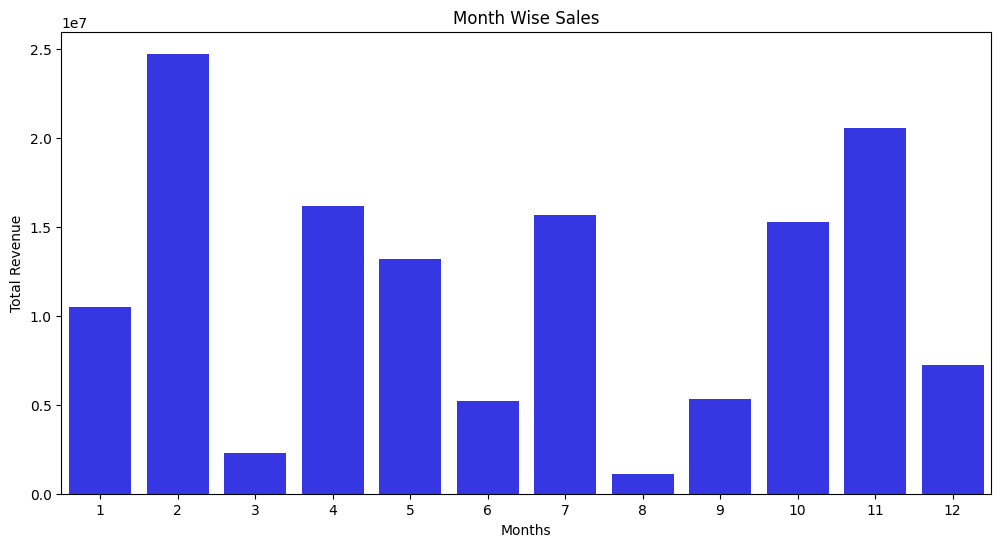

In [23]:
plt.figure(figsize=(12,6))

sns.barplot(data=month_wise_sales, x= 'Order Month', y= 'Total Revenue', color='blue', alpha = 0.9)

plt.title("Month Wise Sales")
plt.xlabel("Months")
plt.ylabel("Total Revenue")

plt.show()

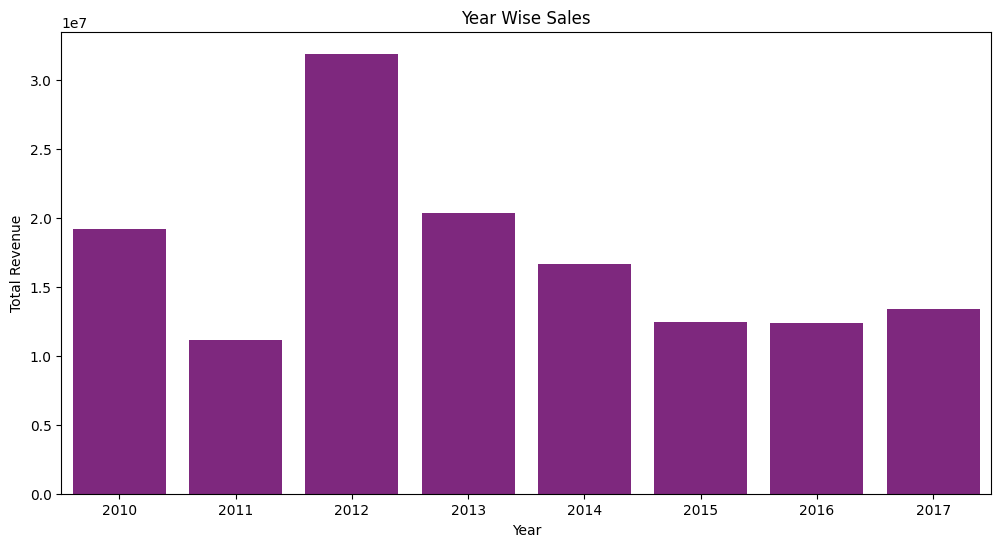

In [24]:
plt.figure(figsize=(12,6))

sns.barplot(data=year_wise_sales, x= 'Order Year', y= 'Total Revenue', color='purple', alpha = 0.9)

plt.title("Year Wise Sales")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

plt.show()

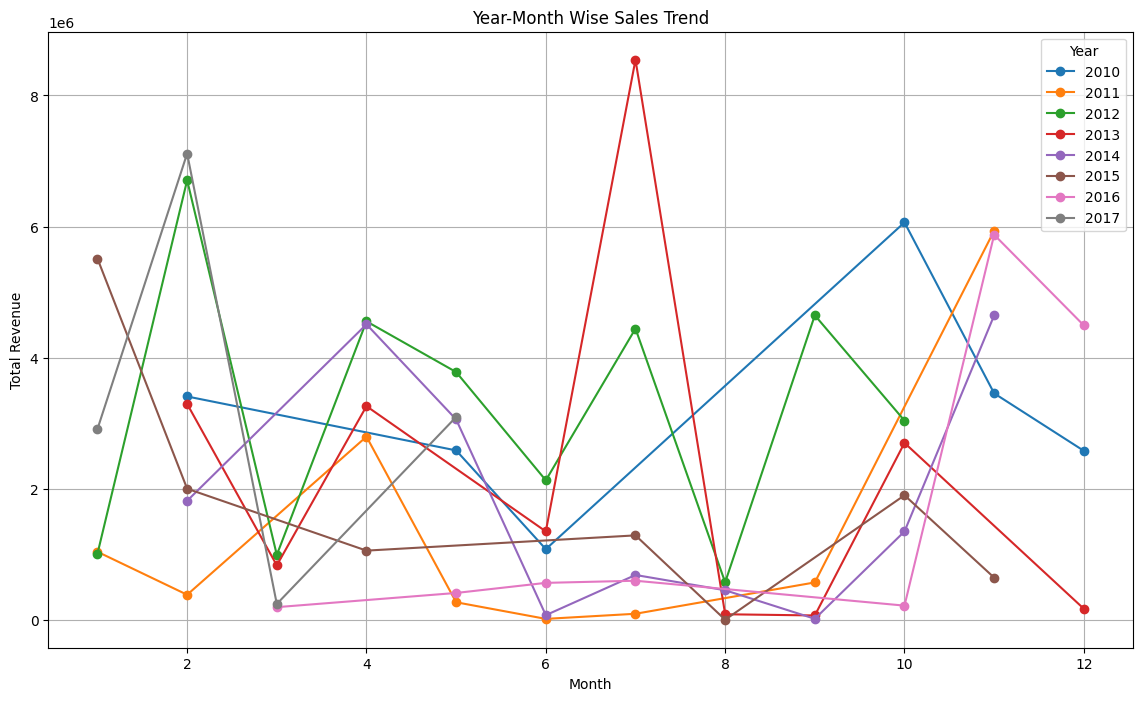

In [25]:
plt.figure(figsize=(14, 8))

for year in yearly_month_wise_sales['Order Year'].unique():
    monthly_data = yearly_month_wise_sales[yearly_month_wise_sales['Order Year'] == year]
    plt.plot(monthly_data['Order Month'], monthly_data['Total Revenue'], marker='o', label=str(year))

plt.title('Year-Month Wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title= 'Year')
plt.grid(True)
plt.show()

In [26]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Month', 'Order Year'],
      dtype='object')

In [27]:
total_revenue = data['Total Revenue'].sum()
total_cost = data['Total Cost'].sum()
total_profit = data['Total Profit'].sum()

print(f"Total Revenue : $ {round(total_revenue,2)}")
print(f"Total Cost : $ {round(total_cost,2)}")
print(f"Total Profit : $ {round(total_profit,2)}")

Total Revenue : $ 137348768.31
Total Cost : $ 93180569.91
Total Profit : $ 44168198.4


In [28]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= 'coolwarm', linewidths=0.5)

plt.title("Correlation matrix of attributes")

plt.show()

ValueError: could not convert string to float: 'Australia and Oceania'

<ipython-input-29-85a312138bbe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Country', data=top5_sales_countries, ax=axes[0], palette='viridis')
<ipython-input-29-85a312138bbe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Profit', y='Country', data=top5_profit_countries, ax=axes[1], palette='viridis')


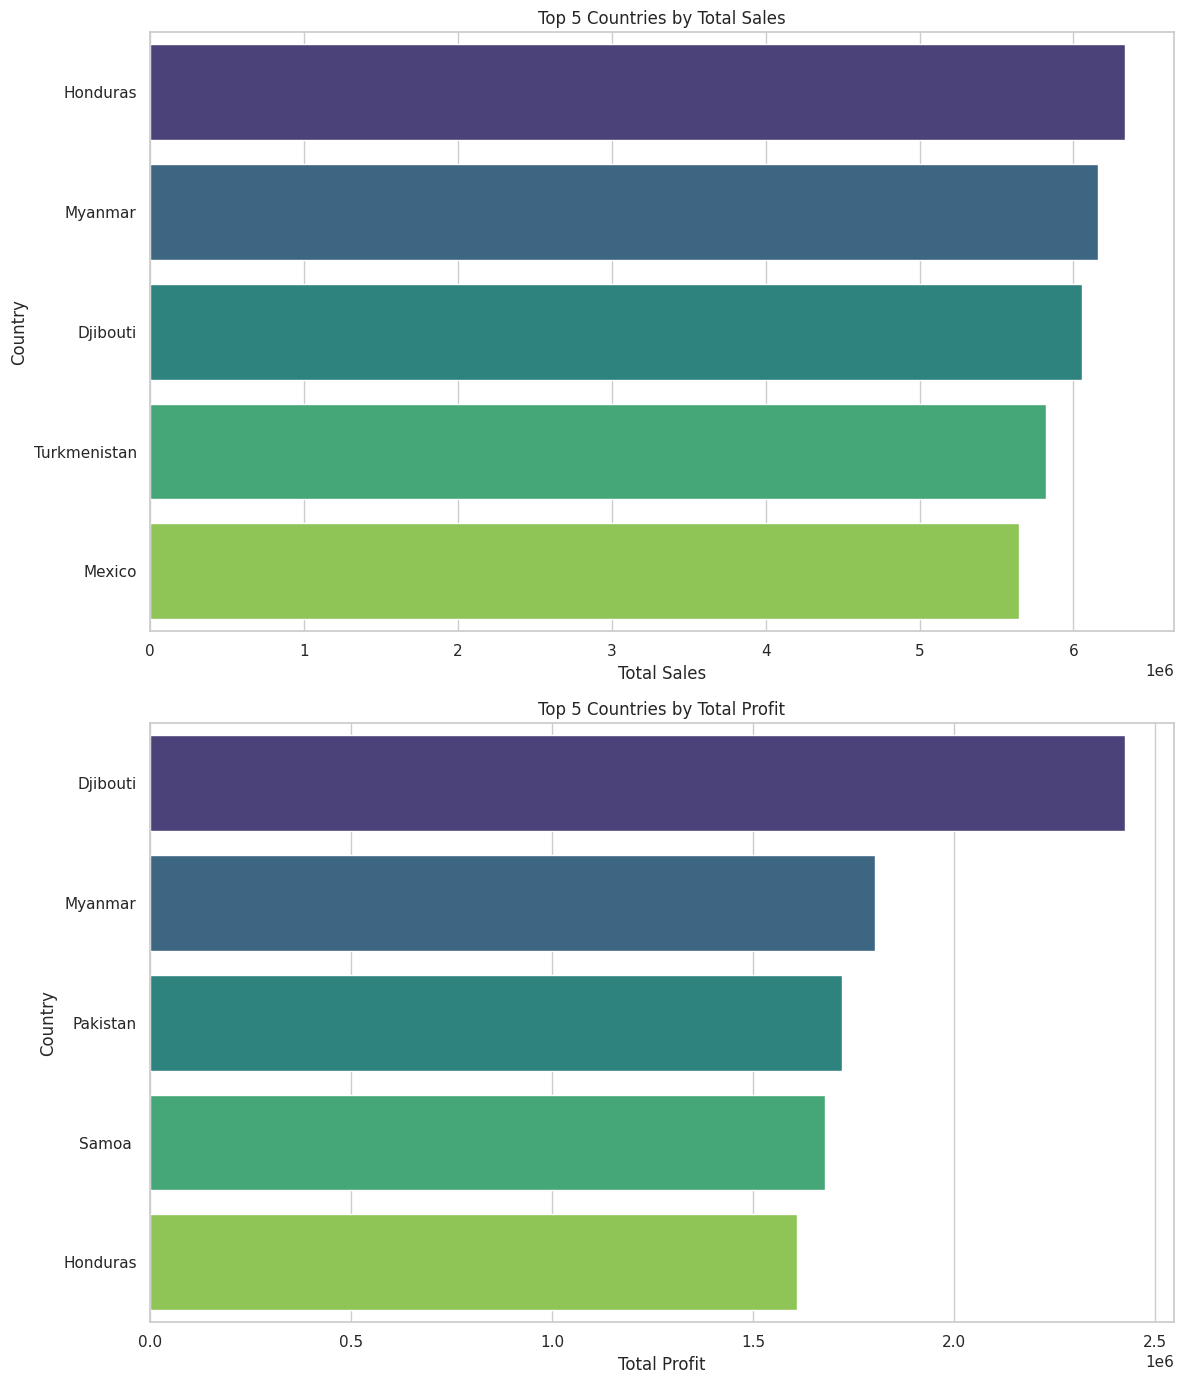

In [29]:
country_sales_profit = data.groupby('Country').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}).reset_index()
top5_sales_countries = country_sales_profit.nlargest(5, 'Total Revenue')
top5_profit_countries = country_sales_profit.nlargest(5, 'Total Profit')
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 14))
sns.barplot(x='Total Revenue', y='Country', data=top5_sales_countries, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Countries by Total Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Country')
sns.barplot(x='Total Profit', y='Country', data=top5_profit_countries, ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 Countries by Total Profit')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Country')
plt.tight_layout()
plt.show()